## Everything, Everywhere, All at Once:
### A study in finding the hidden stories in chaotic datasets
Brian and I were tasks by some big movie executives to help them determine what kind of movie they should be working on next based on IMDB data. Here are our results

### Rough Questions to Answer
##### How do genre trends change over time?
##### Actors impacts on ratings count and average
##### how popular are movies broken down by vote count?
##### who are top actors by genre? 

First we need to import our libraries and dataframes

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
basics_df = pd.read_csv('Data/title.basics.tsv', sep='\t')
ratings_df = pd.read_csv('Data/title.ratings.tsv', sep='\t')

In [4]:
basics_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,5,"Action,Adventure,Animation"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [5]:
ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2064
1,tt0000002,5.6,279
2,tt0000003,6.5,2038
3,tt0000004,5.4,180
4,tt0000005,6.2,2799


The basics and ratings databases include a shared variable, so we can combine them

In [7]:
basics_ratings_df = basics_df.merge(ratings_df, how='inner', on='tconst')
basics_ratings_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,2064
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.6,279
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,5,"Action,Adventure,Animation",6.5,2038
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.4,180
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2799


### Cleaning the data for easier analysis and looking for the story

First, our clients are only looking for data on movies, so we can remove all other rows.

In [8]:
basics_ratings_df.titleType.unique()

array(['short', 'movie', 'tvShort', 'tvMovie', 'tvEpisode', 'tvSeries',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

In [34]:
movies_df = basics_ratings_df[basics_ratings_df.titleType == 'movie']

Then, we can determine variable types and correct as needed

In [35]:
movies_df.describe()

,averageRating,numVotes
count,314509.000000,3.145090e+05
mean,6.167837,3.621551e+03
std,1.360726,3.623180e+04
min,1.000000,5.000000e+00
25%,5.300000,1.900000e+01
50%,6.300000,6.100000e+01
75%,7.100000,3.130000e+02
max,10.000000,2.920364e+06


In [36]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 314509 entries, 8 to 1463604
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          314509 non-null  object 
 1   titleType       314509 non-null  object 
 2   primaryTitle    314509 non-null  object 
 3   originalTitle   314509 non-null  object 
 4   isAdult         314509 non-null  object 
 5   startYear       314509 non-null  object 
 6   endYear         314509 non-null  object 
 7   runtimeMinutes  314509 non-null  object 
 8   genres          314509 non-null  object 
 9   averageRating   314509 non-null  float64
 10  numVotes        314509 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 28.8+ MB


In [37]:
def year_to_decade(x: str) -> str:
    x = x[0:3] + '0'
    return x

In [38]:
def obj_to_int(x: str) -> int:
    x = int(x)
    return x

In [39]:
def first_genre(x:str) -> str:
    genre = x.split(',')[0]
    return genre

In [40]:
movies_df = movies_df[~(movies_df.runtimeMinutes == '\\N')]
movies_df = movies_df[~(movies_df.startYear  == '\\N')]
movies_df = movies_df[~(movies_df.genres  == '\\N')]
movies_df = movies_df[~(movies_df.averageRating  == '\\N')]
movies_df = movies_df[~(movies_df.numVotes  == '\\N')]
movies_df.runtimeMinutes = movies_df.runtimeMinutes.apply(obj_to_int)
movies_df['startYearInt'] = movies_df.startYear.apply(obj_to_int)
movies_df['decade'] = movies_df.startYear.apply(year_to_decade)
movies_df['genre'] = movies_df.genres.apply(first_genre)

In [41]:
movies_df = movies_df[~(movies_df.runtimeMinutes > 300)]
movies_df = movies_df[movies_df.numVotes > 99]

In [42]:
movies_df.groupby('genre').size()

genre
Action         17393
Adult            805
Adventure       6127
Animation       1144
Biography       4332
Comedy         32860
Crime           8228
Documentary     8532
Drama          35053
Family           639
Fantasy          648
Film-Noir         34
History          108
Horror          7036
Music             96
Musical          266
Mystery          686
News               1
Reality-TV         4
Romance          826
Sci-Fi           458
Sport             24
Talk-Show          1
Thriller        1790
War               97
Western          959
dtype: int64

In [43]:
movies_df = movies_df[~(movies_df.genre.isin(['War', 'Talk-Show', 'Sport', 'Reality-TV', 'News', 'Music', 'History', 'Film-Noir']))]
movies_df.genre = movies_df.genre.replace(['Thriller', 'Adventure', 'Crime'], 'Action')
movies_df.genre = movies_df.genre.replace(['Sci-Fi', 'Fantasy'], 'Sci-Fi Fantasy')
movies_df.genre = movies_df.genre.replace(['Biography'], 'Documentary')

In [44]:
movies_df = movies_df.drop(['endYear', 'originalTitle', 'genres', 'titleType', 'isAdult'], axis=1)

In [45]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127782 entries, 8 to 1463578
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          127782 non-null  object 
 1   primaryTitle    127782 non-null  object 
 2   startYear       127782 non-null  object 
 3   runtimeMinutes  127782 non-null  int64  
 4   averageRating   127782 non-null  float64
 5   numVotes        127782 non-null  int64  
 6   startYearInt    127782 non-null  int64  
 7   decade          127782 non-null  object 
 8   genre           127782 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 9.7+ MB


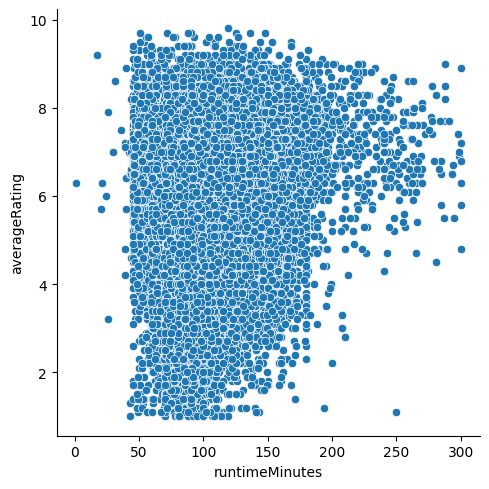

In [46]:
sns.relplot(data=movies_df, x='runtimeMinutes', y='averageRating')

### How do genre trends change over time?

<Axes: xlabel='startYearInt', ylabel='count'>

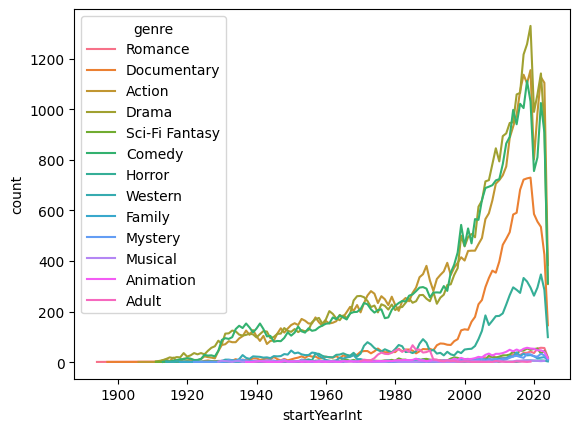

In [48]:
sns.lineplot(
    data=movies_df.groupby(['startYearInt', 'genre']).size().reset_index(name='count'), x='startYearInt', y='count', hue='genre'
)